<a href="https://colab.research.google.com/github/TMhdSofyan/Time-Series-Data-Smoothing/blob/main/02_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32194 sha256=ee07551edafd8f1f3cc288b3d8d58e3e218df93def1dd458ff1dfca1c849ba81
  Stored in directory: /root/.cache/pip/wheels/a6/1c/91/32f7a6b0a9d6bbcef17a7fc0d065f9a9b8d9904551b377b64d
Successfully built jcopml


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [79]:
df = pd.read_csv('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/02_Well_F12H.csv', sep = ';', index_col='Index', parse_dates=['Date'])
df.head()

,Date,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_WHP_P,AVG_WHT_P
Index,,,,,
1,2008-02-12,201.250,18.640,106.806,16.295
2,2008-02-13,182.145,16.467,120.889,53.374
3,2008-02-14,181.868,12.660,113.718,72.738
4,2008-02-15,180.832,5.264,116.831,69.996
5,2008-02-16,180.501,12.385,115.434,71.518


In [11]:
df.columns

Index(['Date', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P', 'AVG_WHT_P'], dtype='object')

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AVG_DP_TUBING'}>],
       [<Axes: title={'center': 'AVG_ANNULUS_PRESS'}>,
        <Axes: title={'center': 'AVG_WHP_P'}>],
       [<Axes: title={'center': 'AVG_WHT_P'}>, <Axes: >]], dtype=object)

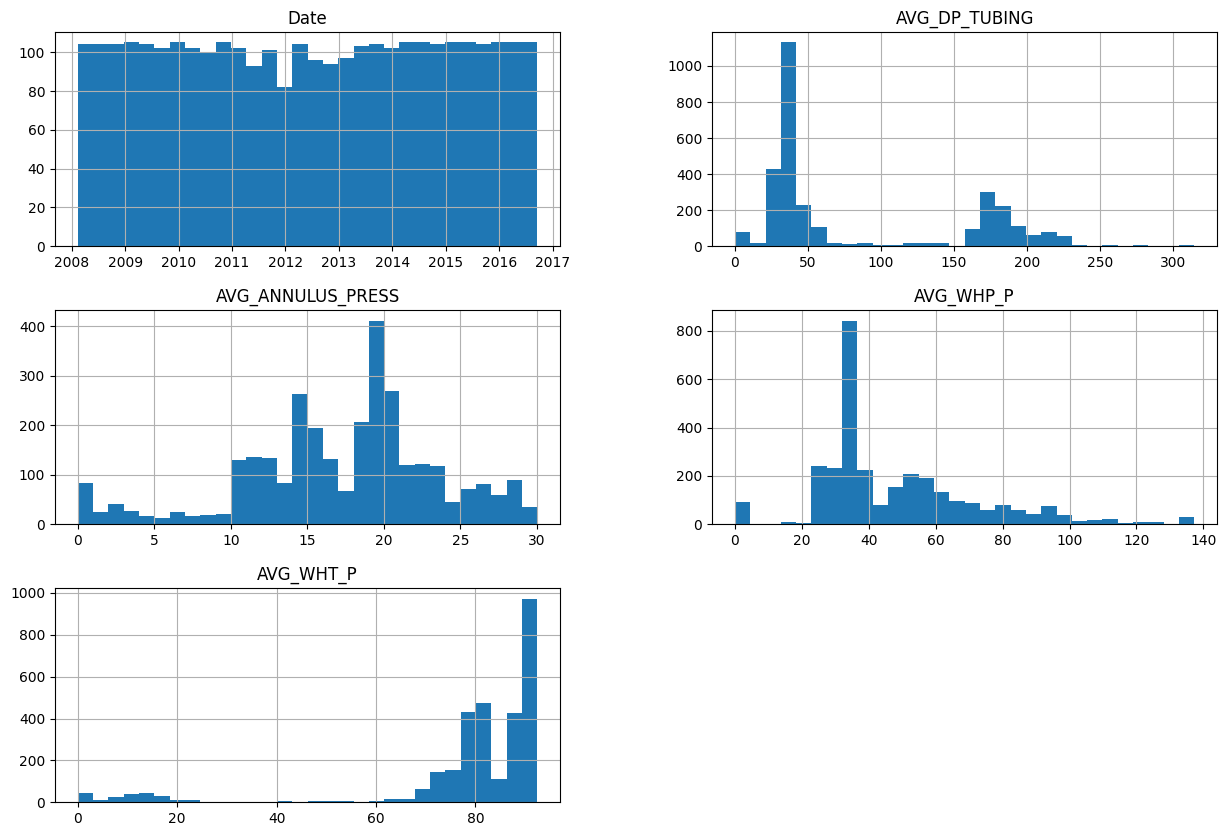

In [15]:
# more detailed look at the Univariate plots
df.hist(bins=30, figsize=(15,10))

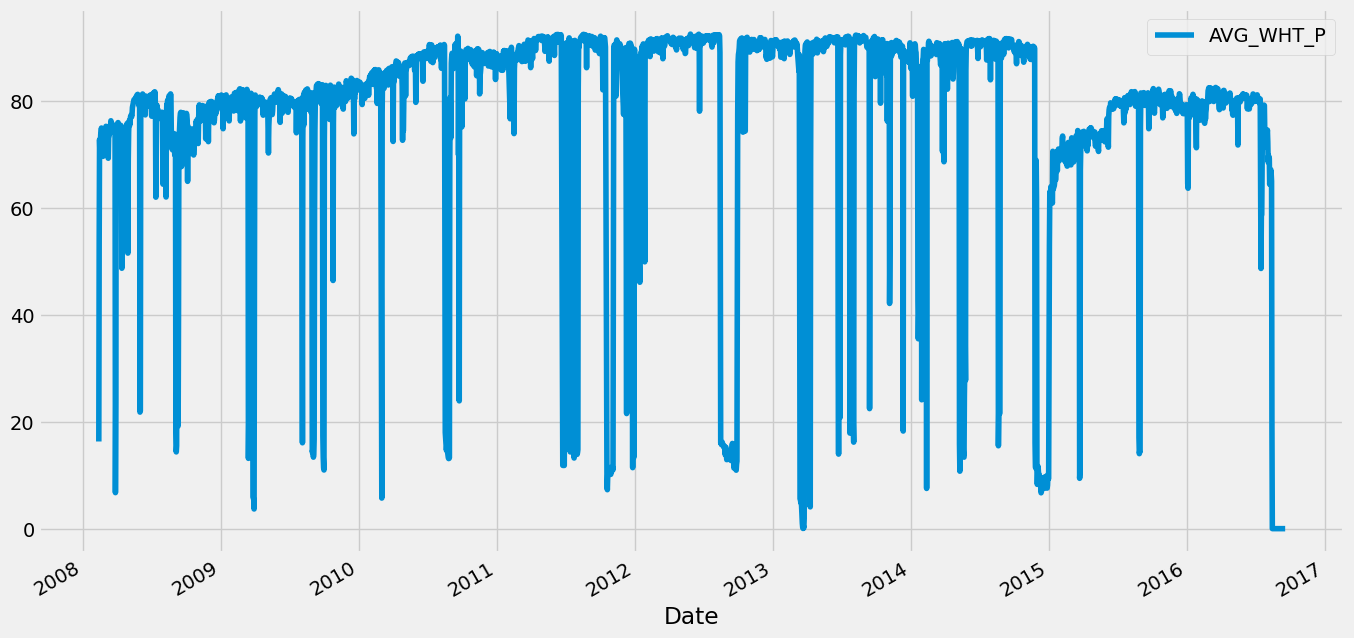

In [78]:
import matplotlib.pyplot as plt
df.plot('Date', 'AVG_WHT_P', figsize=(15,8))
plt.show()

In [80]:
df_1 = df.drop(columns = ['AVG_DP_TUBING', 'AVG_ANNULUS_PRESS','AVG_WHP_P'])

In [81]:
df_1 = df_1.reset_index()
df_1.head()

,Index,Date,AVG_WHT_P
0,1,2008-02-12,16.295
1,2,2008-02-13,53.374
2,3,2008-02-14,72.738
3,4,2008-02-15,69.996
4,5,2008-02-16,71.518


In [82]:
df_1 = df_1.set_index('Date')

In [83]:
df_1 = df_1.drop(columns = 'Index')
df_1.head()

,AVG_WHT_P
Date,
2008-02-12,16.295
2008-02-13,53.374
2008-02-14,72.738
2008-02-15,69.996
2008-02-16,71.518


<Axes: xlabel='Date'>

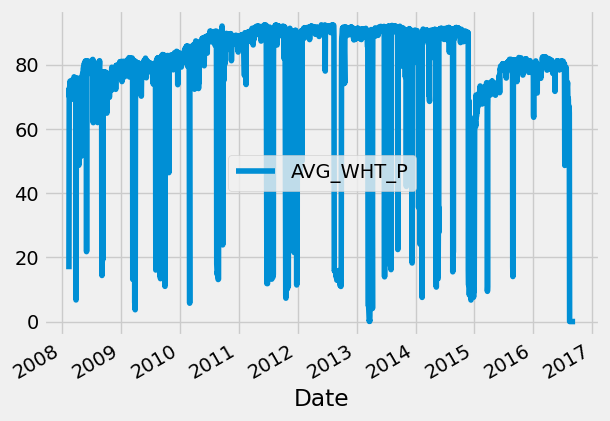

In [84]:
df_1.plot.line()

In [85]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from random import gauss
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from random import random
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


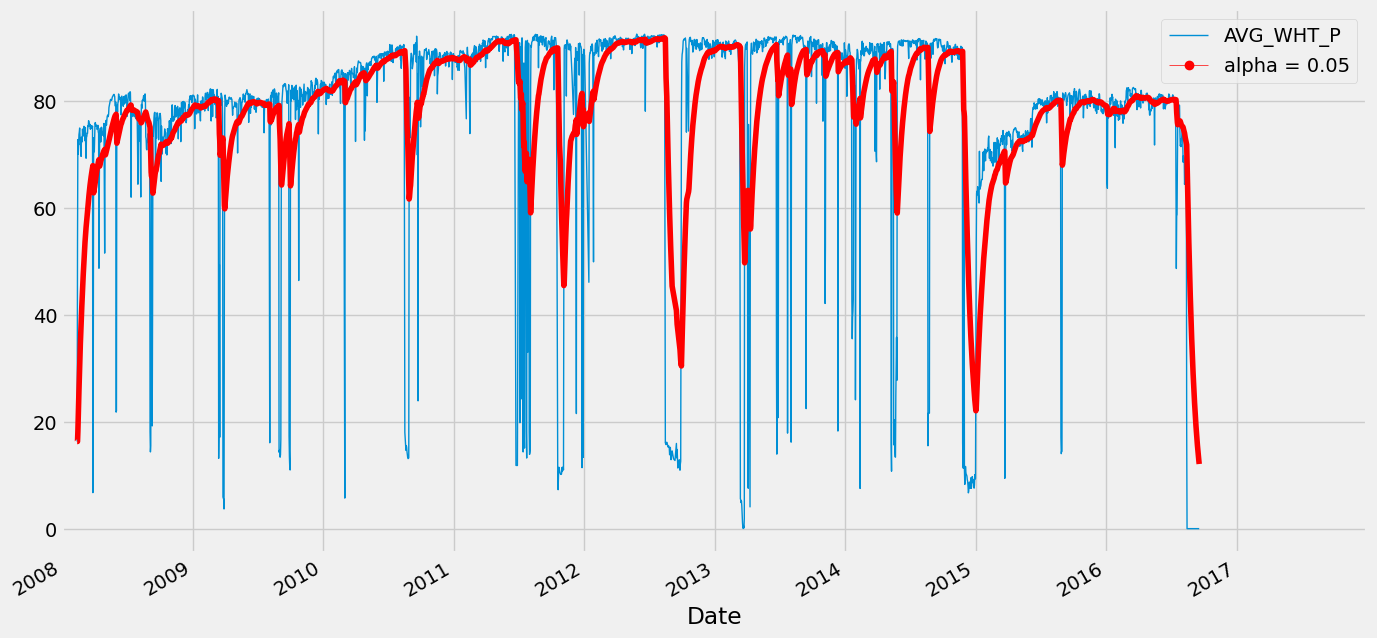

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


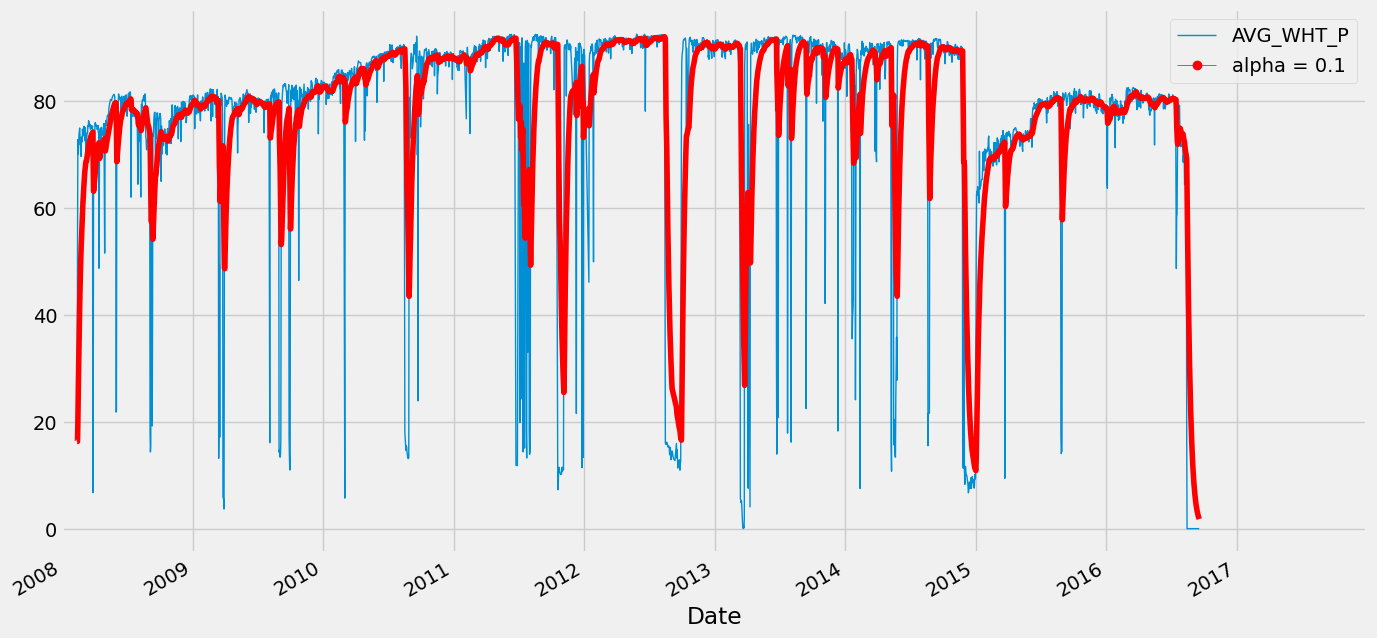

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


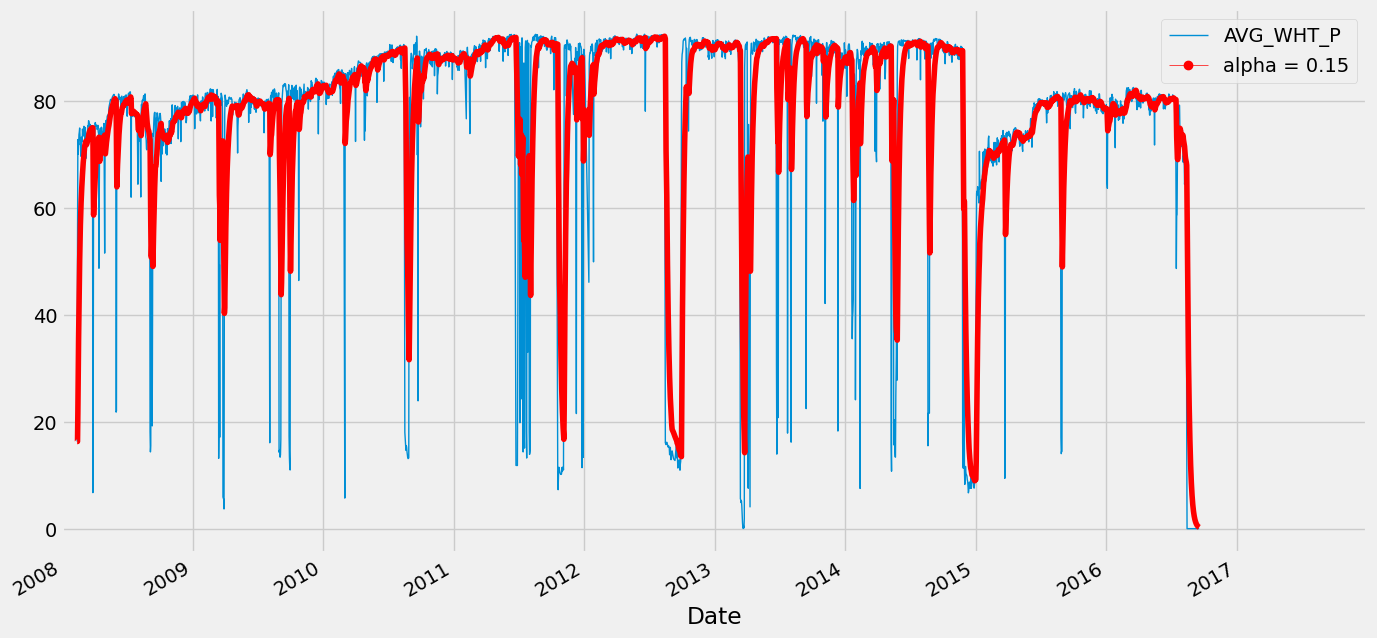

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


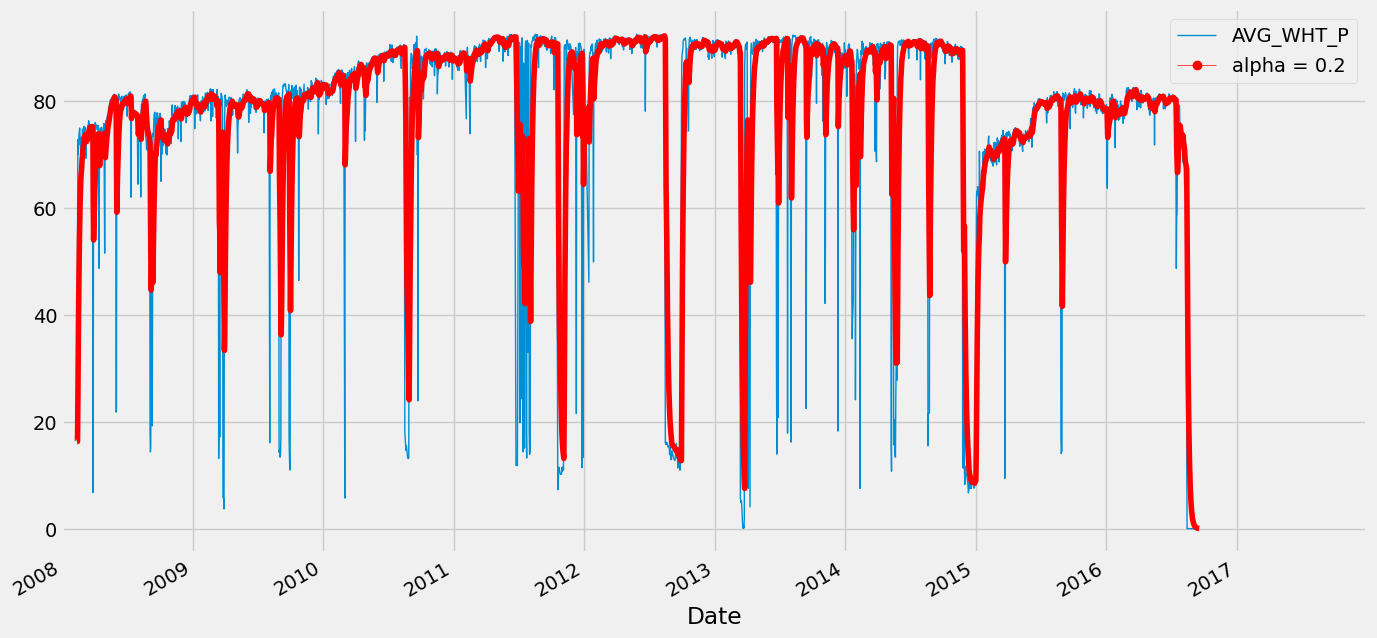

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


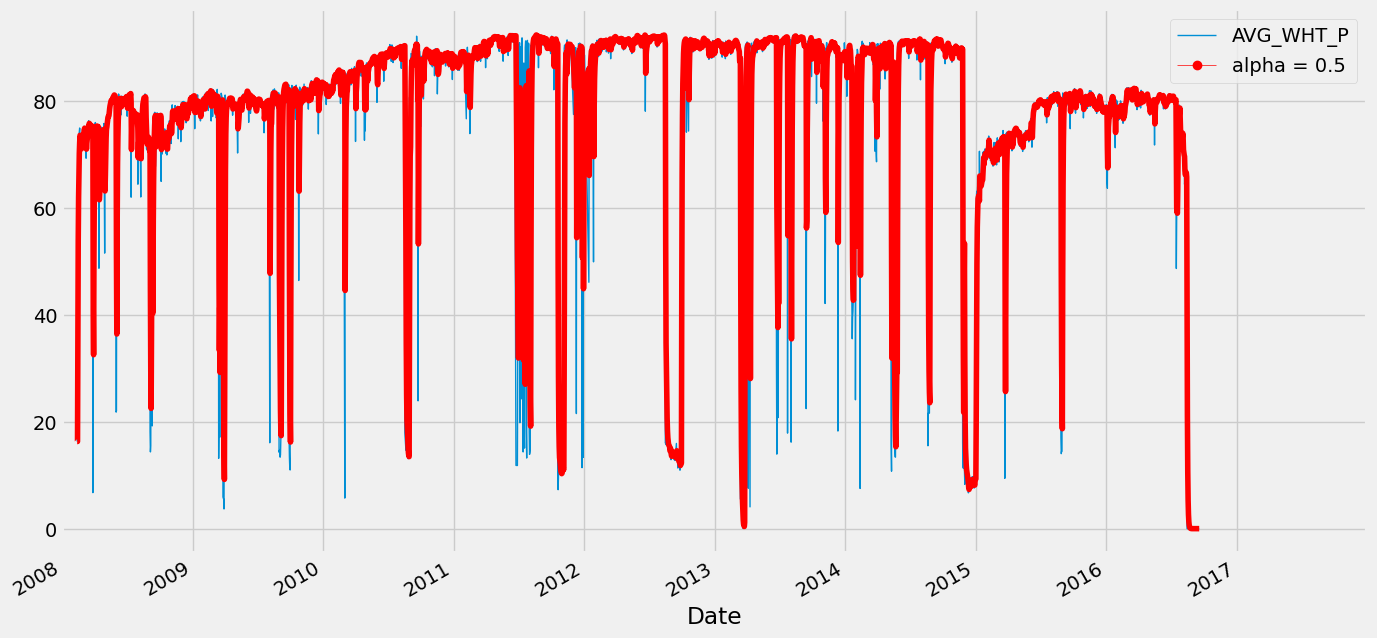

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


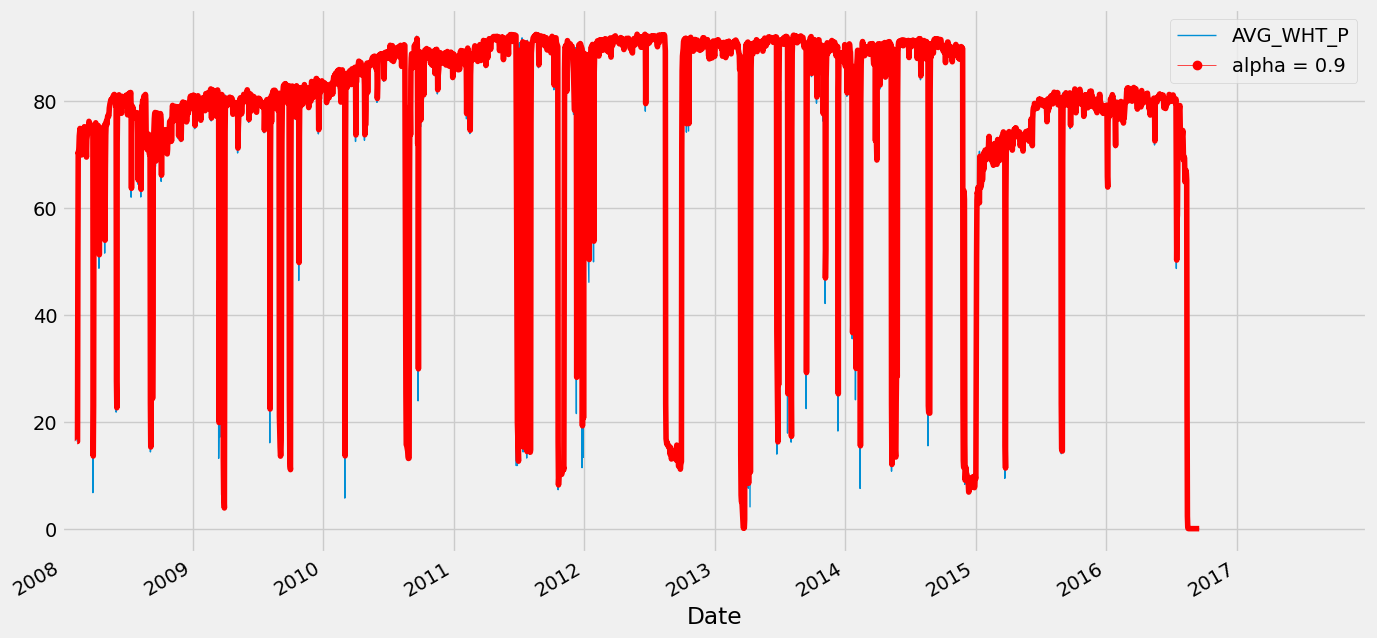

In [87]:
# perform exponential smoothing for three different alpha values
for alpha_sm in [0.05, 0.1, 0.15, 0.2, 0.5, 0.9]:
    df_1.plot.line(xlim=('2008-01-01', '2017-12-31'), linewidth=1)
    fit1 = SimpleExpSmoothing(df_1['AVG_WHT_P']).fit(smoothing_level=alpha_sm, optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True, linewidth=0.5)
    fit1.fittedvalues.plot(color='red')
    plt.gcf().set_size_inches(15, 8)
    plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# calculate MSE and MAE for the alpha=0.05 model
fit1 = SimpleExpSmoothing(df_1['AVG_WHP_P']).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12)
mse1 = mean_squared_error(df_1['AVG_WHP_P'][-12:], fcast1)
mae1 = mean_absolute_error(df_1['AVG_WHP_P'][-12:], fcast1)
print("MSE for alpha=0.2: ", mse1)
print("MAE for alpha=0.2: ", mae1)
     

MSE for alpha=0.2:  0.00011471918602795051
MAE for alpha=0.2:  0.01071070427320027


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [91]:
df_2 = df_1.copy()

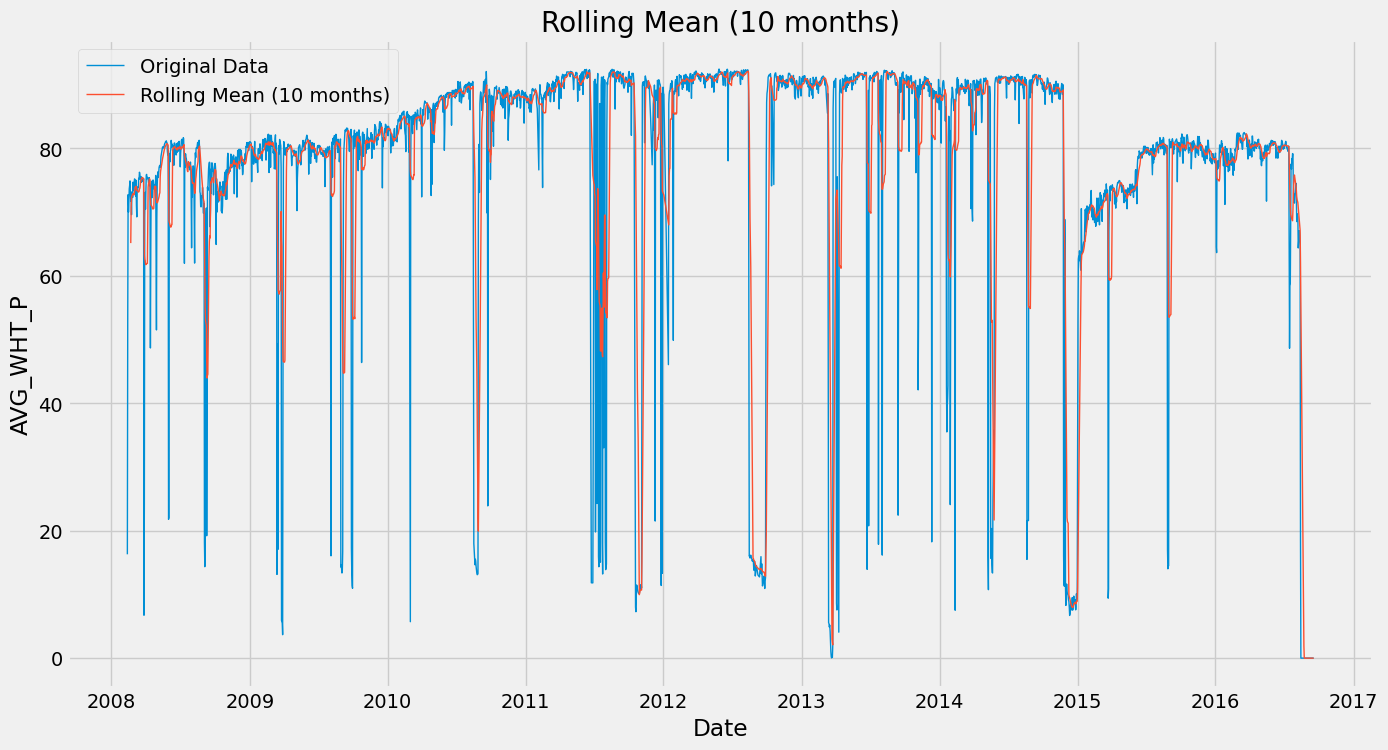

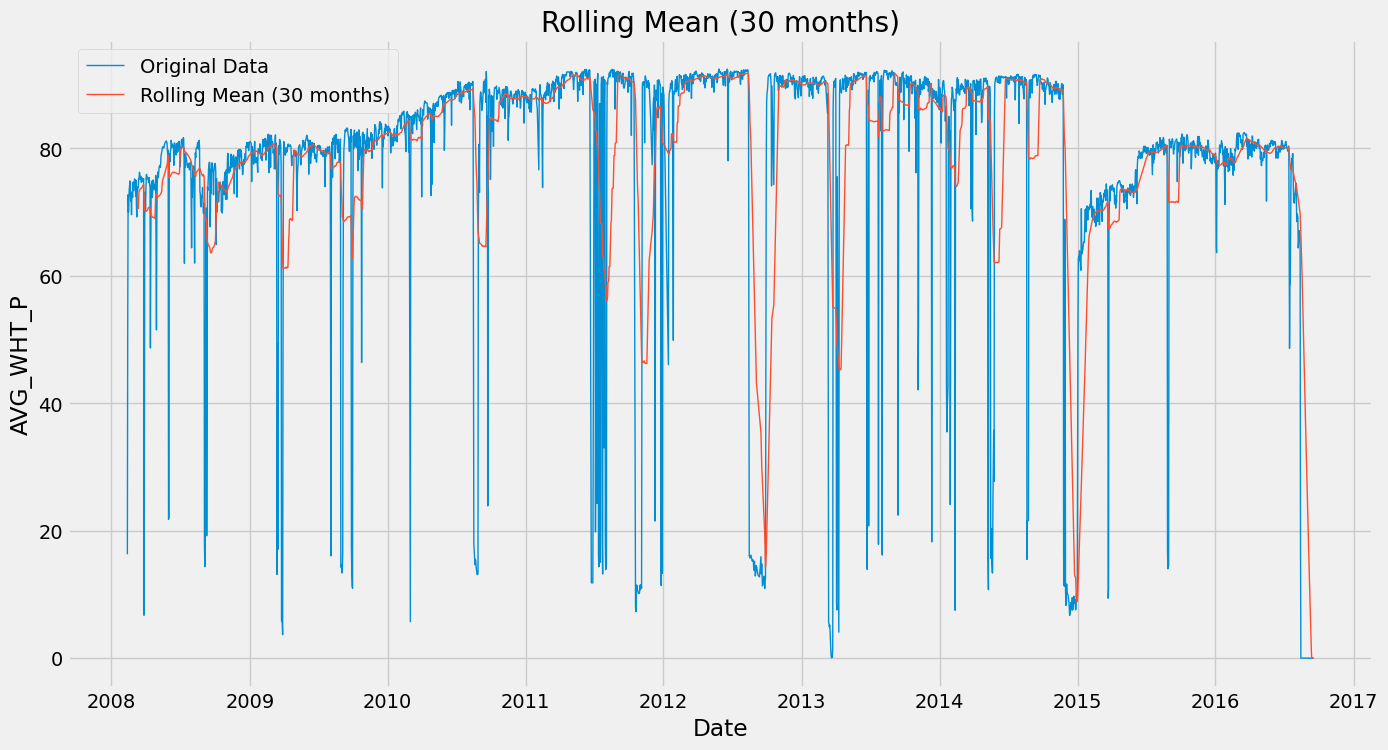

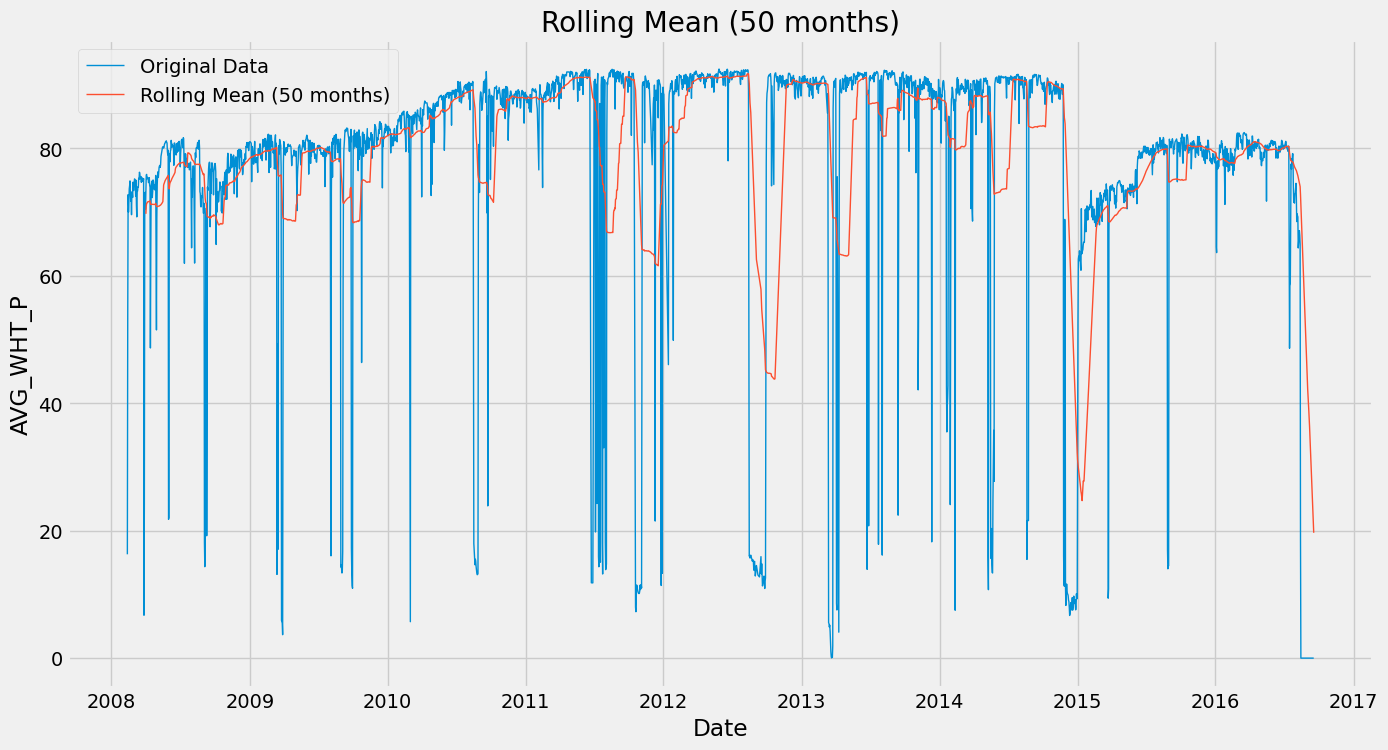

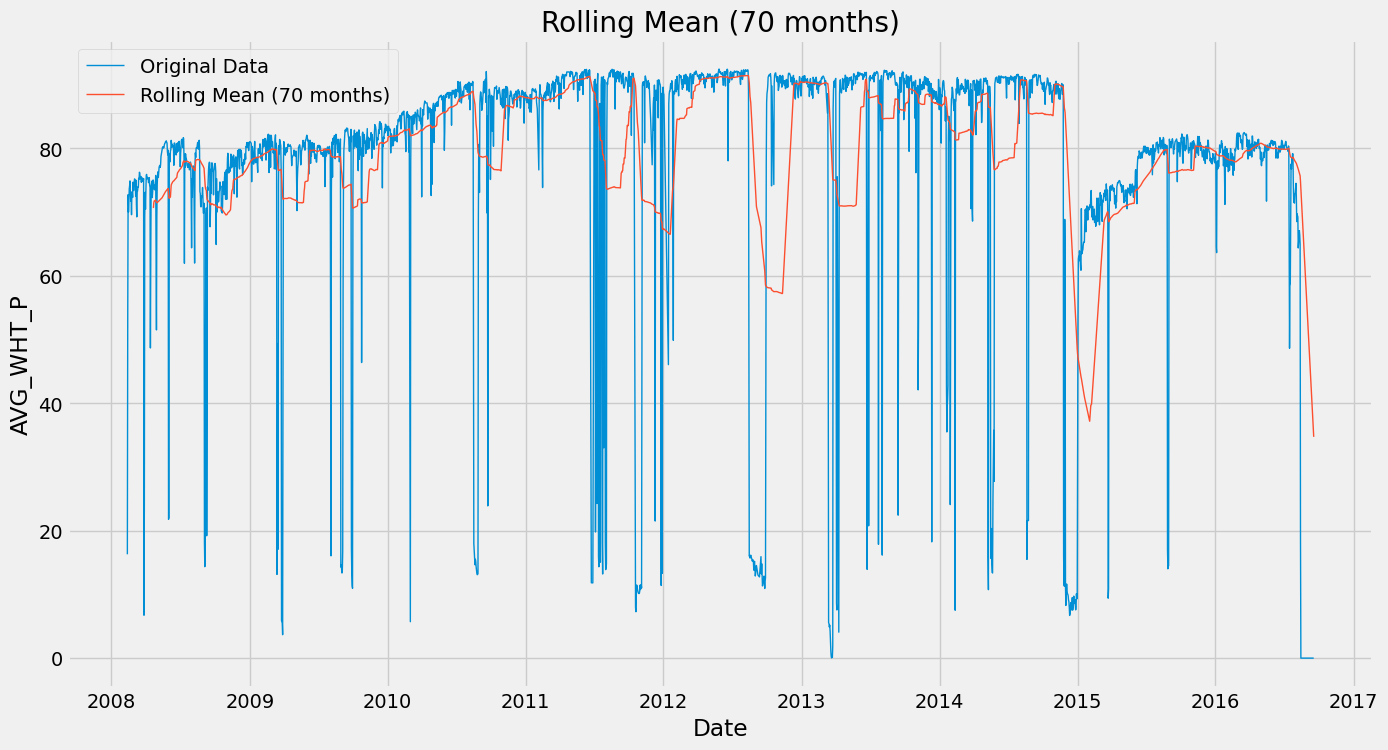

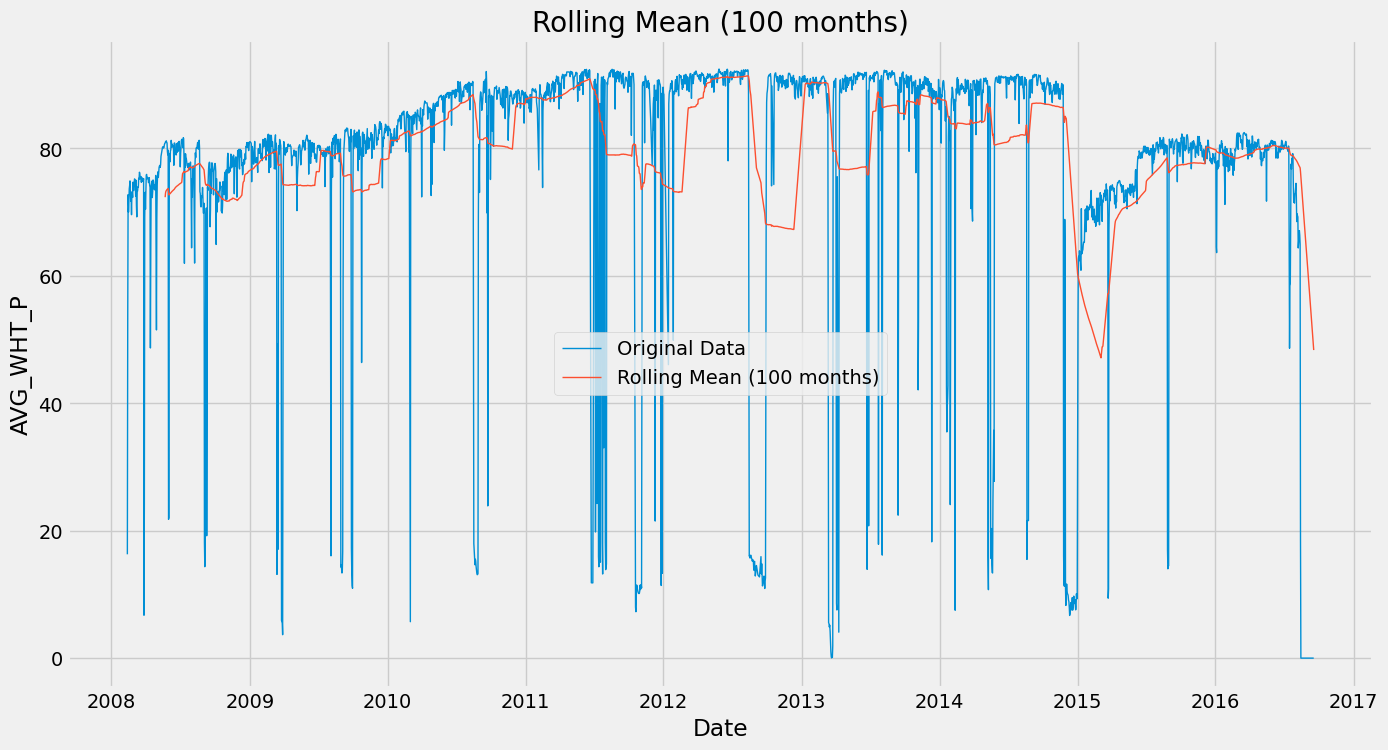

In [94]:
# calculate rolling mean with different window sizes
windows = [10, 30, 50, 70, 100]
for w in windows:
    # create a new figure for each window size
    plt.figure(figsize=(15, 8))
    rolling_mean = df_2['AVG_WHT_P'].rolling(window=w).mean()
    plt.plot(df_2.index, df_2['AVG_WHT_P'], label='Original Data', linewidth=1)
    plt.plot(df_2.index, rolling_mean, label=f'Rolling Mean ({w} months)', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('AVG_WHT_P')
    plt.title(f'Rolling Mean ({w} months)')
    plt.legend()
    plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


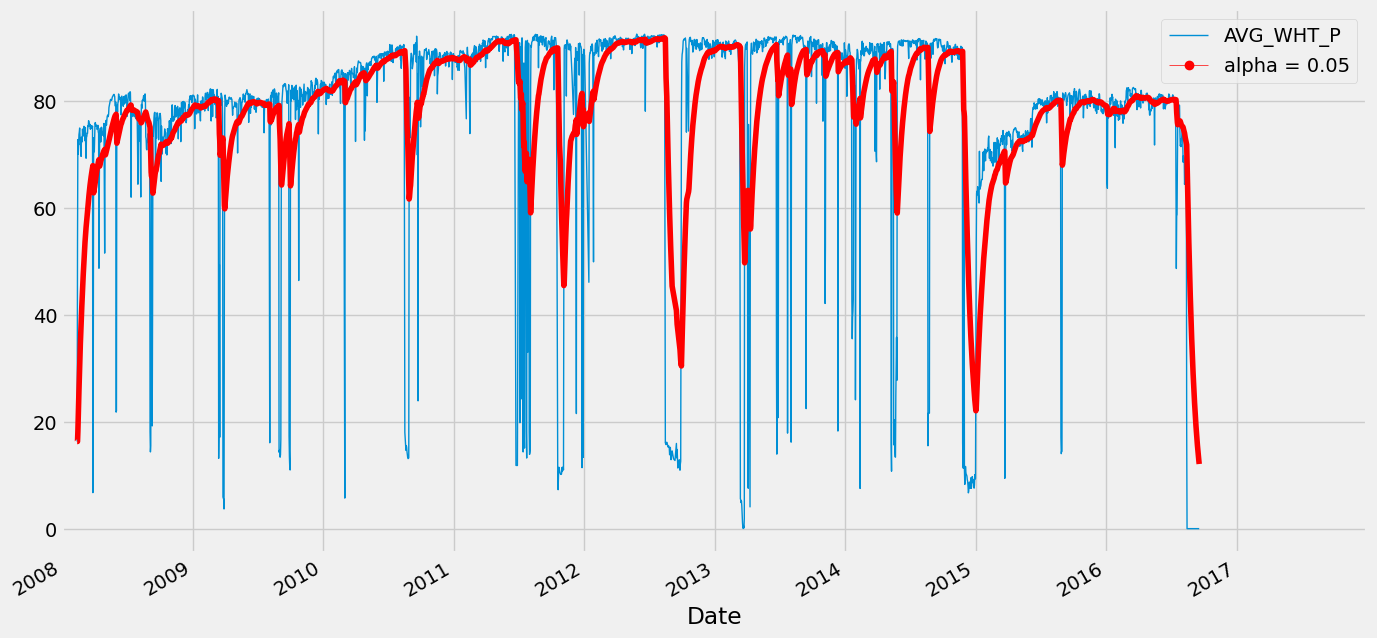

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


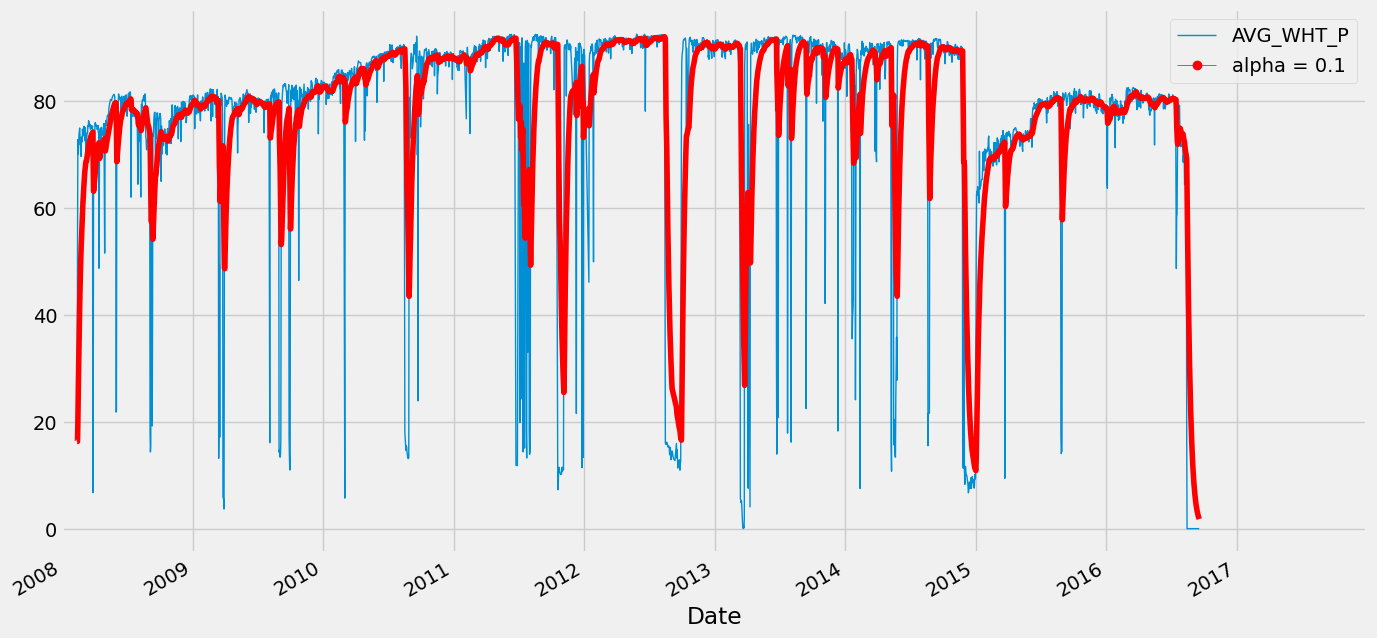

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


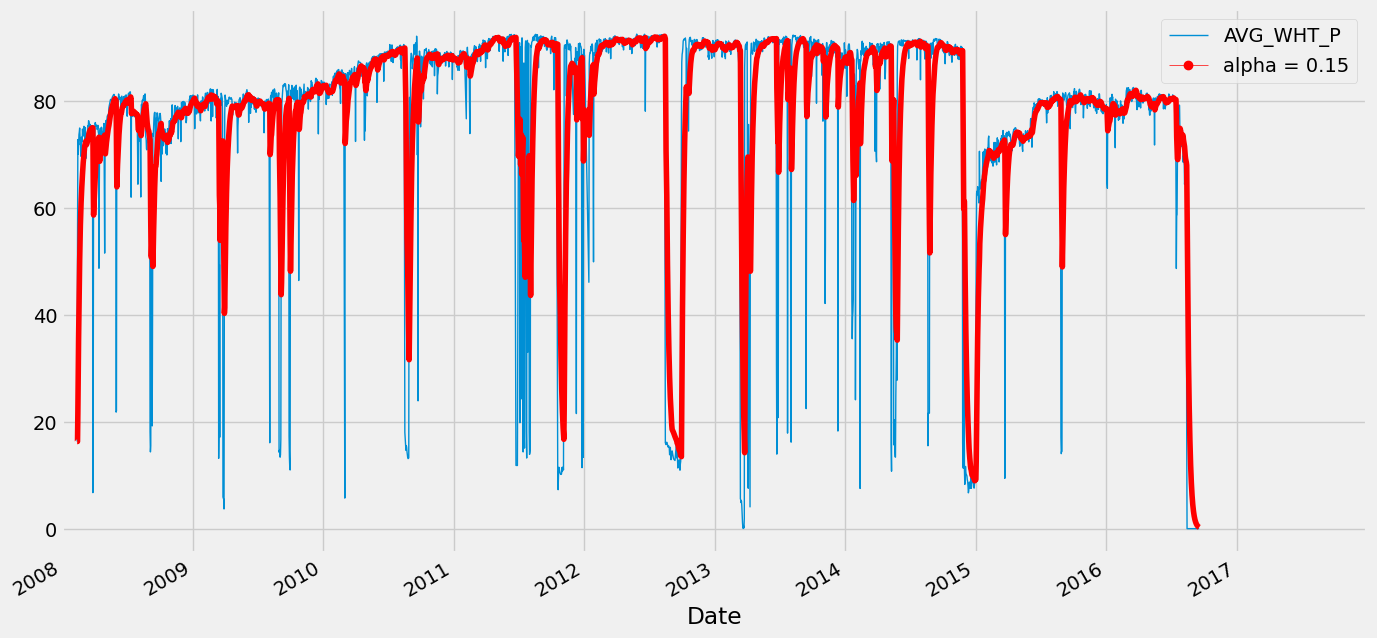

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


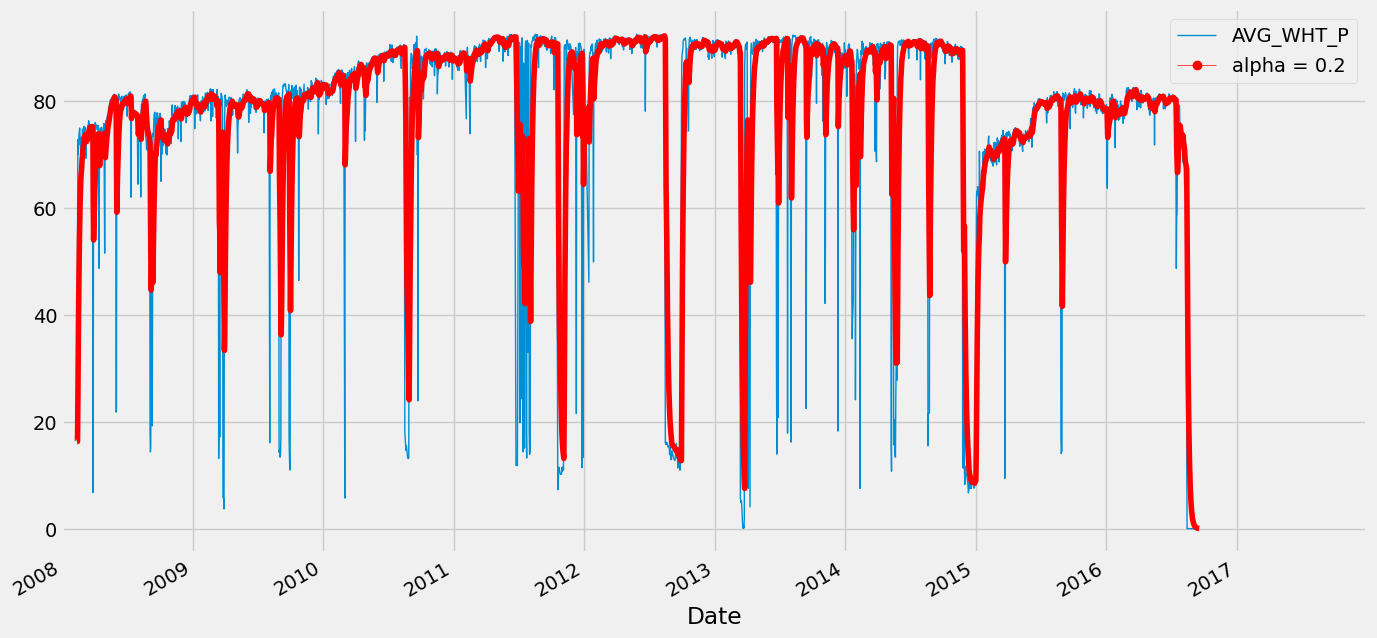

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


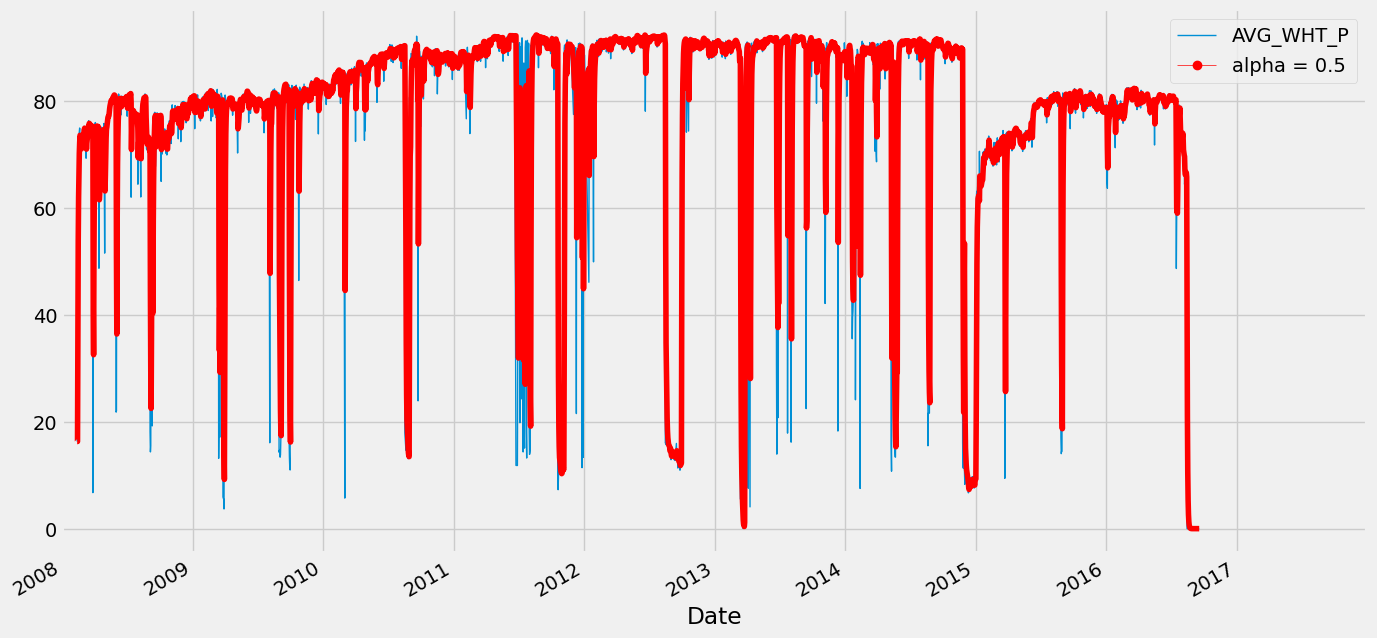

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


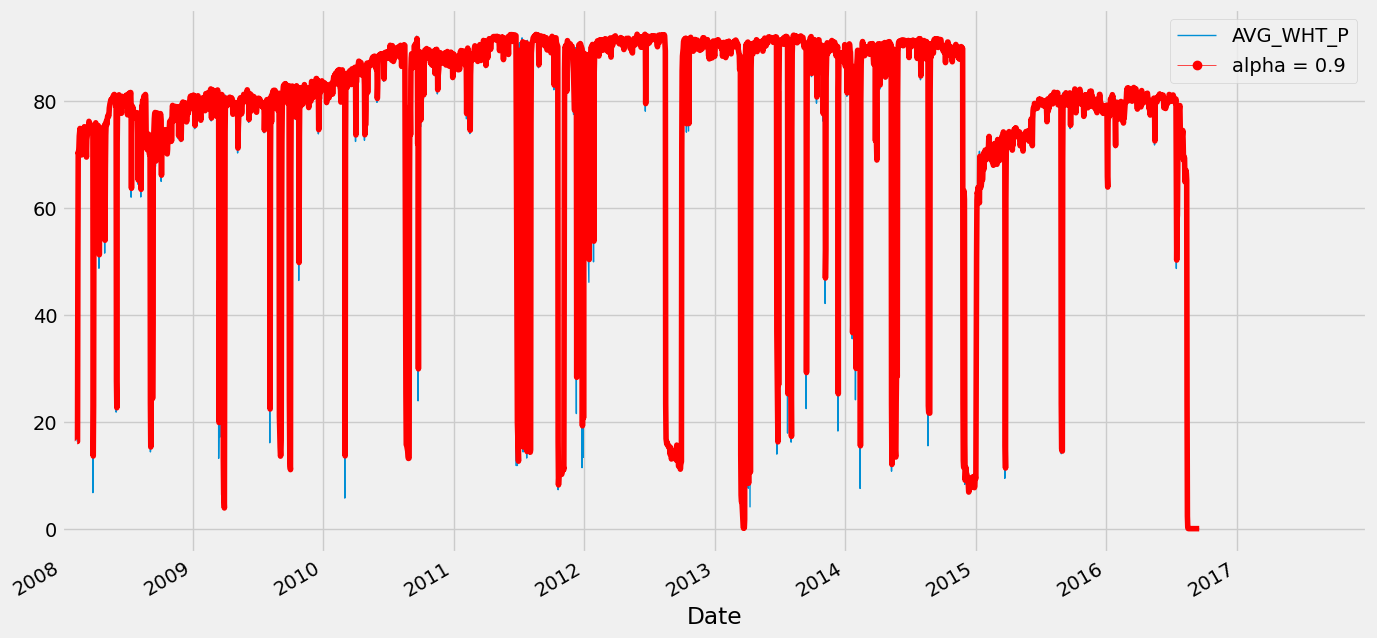

                     AVG_WHT_P  alpha = 0.05  alpha = 0.1  alpha = 0.15  \
2008-02-12 00:00:00     16.295           NaN          NaN           NaN   
2008-02-13 00:00:00     53.374           NaN          NaN           NaN   
2008-02-14 00:00:00     72.738           NaN          NaN           NaN   
2008-02-15 00:00:00     69.996           NaN          NaN           NaN   
2008-02-16 00:00:00     71.518           NaN          NaN           NaN   
...                        ...           ...          ...           ...   
3063                       NaN  96697.586696     4.978738      1.227482   
3064                       NaN  96697.586696     4.978738      1.227482   
3065                       NaN  96697.586696     4.978738      1.227482   
3066                       NaN  96697.586696     4.978738      1.227482   
3067                       NaN  96697.586696     4.978738      1.227482   

                     alpha = 0.2  alpha = 0.5  alpha = 0.9  
2008-02-12 00:00:00          NaN      

In [109]:
# perform exponential smoothing for three different alpha values
forecast_dfs = []  # a list to store the forecasted dataframes
for alpha_sm in [0.05, 0.1, 0.15, 0.2, 0.5, 0.9]:
    df_1.plot.line(xlim=('2008-01-01', '2017-12-31'), linewidth=1)
    fit1 = SimpleExpSmoothing(df_1['AVG_WHT_P']).fit(smoothing_level=alpha_sm, optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
    forecast_df = pd.DataFrame(fcast1)  # create a dataframe with the forecasted values
    forecast_dfs.append(forecast_df)  # append the forecasted dataframe to the list

    fcast1.plot(marker='o', color='red', legend=True, linewidth=0.5)
    fit1.fittedvalues.plot(color='red')
    plt.gcf().set_size_inches(15, 8)
    plt.show()

# concatenate the original dataframe with the forecasted dataframes along the index
df_forecasts = pd.concat([df_1] + forecast_dfs, axis=1)

# select only the columns that correspond to the forecasted values
forecast_cols = [col for col in df_forecasts.columns if col.startswith('alpha')]
df_forecasts[forecast_cols] = np.exp(df_forecasts[forecast_cols])

# print the resulting dataframe
print(df_forecasts)

In [110]:
df_forecasts.describe()

,AVG_WHT_P,alpha = 0.05,alpha = 0.1,alpha = 0.15,alpha = 0.2,alpha = 0.5,alpha = 0.9
count,3056.000000,12.000000,1.200000e+01,1.200000e+01,12.000000,1.200000e+01,12.0
mean,78.623926,96697.586696,4.978738e+00,1.227482e+00,1.023582,1.000000e+00,1.0
std,20.275994,0.000000,9.276721e-16,2.319180e-16,0.000000,2.319180e-16,0.0
min,0.000000,96697.586696,4.978738e+00,1.227482e+00,1.023582,1.000000e+00,1.0
25%,78.420500,96697.586696,4.978738e+00,1.227482e+00,1.023582,1.000000e+00,1.0
50%,82.924500,96697.586696,4.978738e+00,1.227482e+00,1.023582,1.000000e+00,1.0
75%,90.160000,96697.586696,4.978738e+00,1.227482e+00,1.023582,1.000000e+00,1.0
max,92.459000,96697.586696,4.978738e+00,1.227482e+00,1.023582,1.000000e+00,1.0


array([[<Axes: title={'center': 'AVG_WHT_P'}>,
        <Axes: title={'center': 'alpha = 0.05'}>,
        <Axes: title={'center': 'alpha = 0.1'}>],
       [<Axes: title={'center': 'alpha = 0.15'}>,
        <Axes: title={'center': 'alpha = 0.2'}>,
        <Axes: title={'center': 'alpha = 0.5'}>],
       [<Axes: title={'center': 'alpha = 0.9'}>, <Axes: >, <Axes: >]],
      dtype=object)

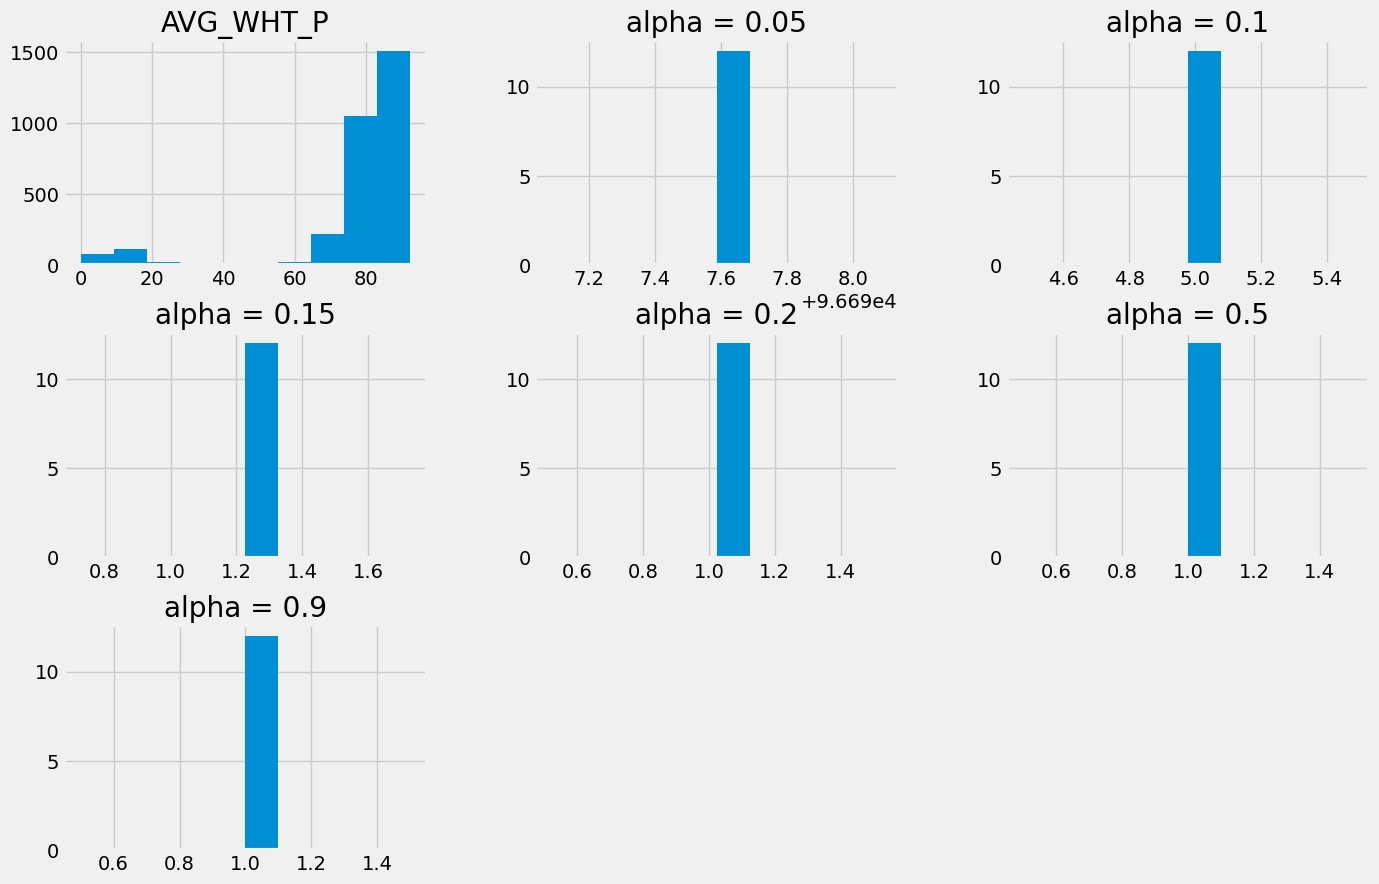

In [111]:
df_forecasts.hist(figsize=(15, 10))